# Linear Algebra and SVD

## Part 1: Linear Algebra Concepts

### 1.1 Vector Norms and Properties
- **Exercise 1**: Compute the 2-norm, 1-norm, and infinity norm of the following vector.

In [26]:
import numpy as np

def compute_norms(x: np.ndarray):
	x = np.squeeze(x)
	norm_2 = np.linalg.norm(x, 2)
	norm_1 = np.linalg.norm(x, 1)
	norm_inf = np.max(x).item()
	return norm_2, norm_1, norm_inf


In [27]:
# Example vector
x = np.array([1, -2, 3, -4])
norms = compute_norms(x)
print(f"2-norm: {norms[0]}, 1-norm: {norms[1]}, Infinity norm: {norms[2]}")

2-norm: 5.477225575051661, 1-norm: 10.0, Infinity norm: 3


- **Exercise 2**: Verify the triangle inequality holds for the vector norms.

In [28]:
def triangle_inequality(x, y, norm_order=2):
    return np.linalg.norm(x + y, norm_order) <= np.linalg.norm(x, norm_order) + np.linalg.norm(y, norm_order)

# Example vectors
x = np.array([1, -2, 3])
y = np.array([4, -1, 0])
print("Triangle inequality holds:", triangle_inequality(x, y))

Triangle inequality holds: True


### 1.2 Matrix Operations 
- **Exercise 3**: Perform basic matrix operations: matrix multiplication, transpose, and inverse. 


In [29]:
# Define two matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Matrix operations
print("Matrix A:\n", A)
print("Matrix B:\n", B)


# Todo
# Matrix multiplication
print("A * B:\n", ...)

# Transpose
print("A Transpose:\n", ...)

# Inverse
print("A Inverse:\n", ...)

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[5 6]
 [7 8]]
A * B:
 Ellipsis
A Transpose:
 Ellipsis
A Inverse:
 Ellipsis


- **Exercise 4**: Compute the determinant and rank of a matrix.

In [30]:
def matrix_properties(A):
    det = np.linalg.det(A)
    rank = np.linalg.matrix_rank(A)
    return det, rank

# Example matrix
A = np.array([[2, 3], [1, 4]])
det, rank = matrix_properties(A)
print(f"Determinant: {det}, Rank: {rank}")

Determinant: 5.000000000000001, Rank: 2


### 1.3 Vector Projection and Orthogonality

- **Exercise 5**: Implement a function to compute the projection of vector (**b**}) onto (**a**).

In [31]:
def vector_projection(a, b):
	return a * ((b.T @ a) / np.linalg.norm(a, 2) ** 2)

# Example usage
a = np.array([1, 2])
b = np.array([3, 4])
print("Projection of b onto a:", vector_projection(a, b))

Projection of b onto a: [2.2 4.4]


- **Exercise 6**: Check if two vectors are orthogonal.

In [32]:
def is_orthogonal(a, b):
    return np.isclose(np.dot(a, b), 0)

# Example vectors
a = np.array([1, 2])
b = np.array([-2, 1])
print("Are a and b orthogonal?", is_orthogonal(a, b))

Are a and b orthogonal? True


## Part 2: Singular Value Decomposition (SVD)

### 2.1 SVD Basics
- **Exercise 1**: Perform SVD on a matrix $( A \in \mathbb{R}^{4 \times 4} )$.

In [33]:
# perform SVD !!! 
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])

U, S, Vt = np.linalg.svd(A)

- **Exercise 2**: Reconstruct matrix \( A \) from its SVD components.

In [34]:
def reconstruct_matrix(U, S, Vt):
    return np.dot(U, np.dot(np.diag(S), Vt))

A_reconstructed = reconstruct_matrix(U, S, Vt)
print("Reconstructed Matrix A:\n", A_reconstructed)


Reconstructed Matrix A:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


- **Exercise 3**: Compare the original matrix \( A \) with the reconstructed matrix to check reconstruction accuracy.

In [35]:
reconstruction_error = np.linalg.norm(A - A_reconstructed)
print(f"Reconstruction Error: {reconstruction_error}")

Reconstruction Error: 1.1033740271936868e-14


### 2.2 Image Compression with SVD
- **Exercise 4**: Load and display a grayscale image.

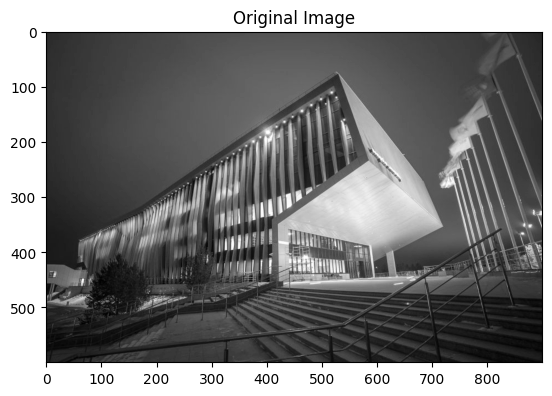

Image size: 540000 pixils


In [36]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
image = io.imread('uni_img.jpeg', as_gray=True)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()
print(f'Image size: {np.prod(image.shape)} pixils')

- **Exercise 5**:
    - Perform SVD on the image matrix.
    - Reconstruct the image using only the top \( k \) singular values. Plot the compressed image.

In [37]:
# Todo
U, S, Vt = np.linalg.svd(image)
print("SVD of Image Matrix done!")

SVD of Image Matrix done!


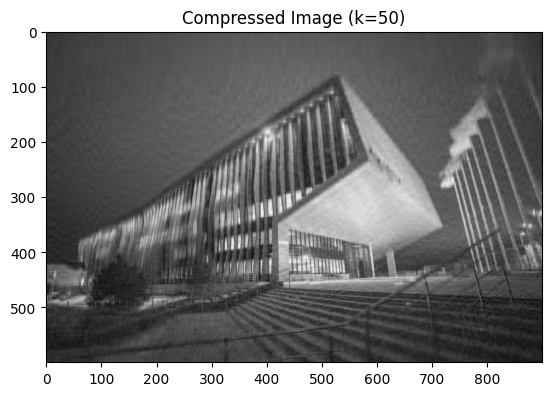

In [38]:

def reconstruct_image(U, S, Vt, k):
	# let's check these values
	return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# Example usage for k = 50
compressed_image = reconstruct_image(U, S, Vt, 50)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (k=50)')
plt.show()


### 2.3 Exploring the Effect of Varying \( k \)
- **Exercise 6**:
    - Try different values of \( k \) to see how the image quality and file size change.
    - Compare the size of the compressed image to the original by counting the number of non-zero elements in the compressed matrix.


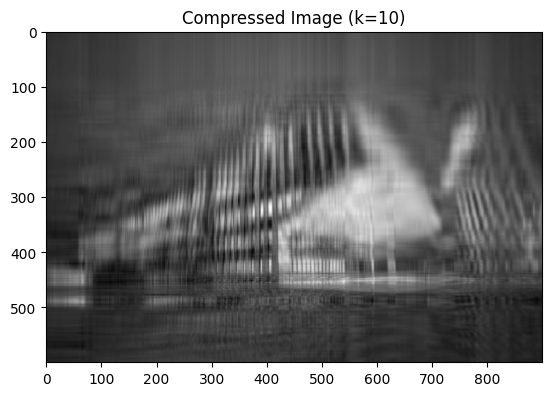

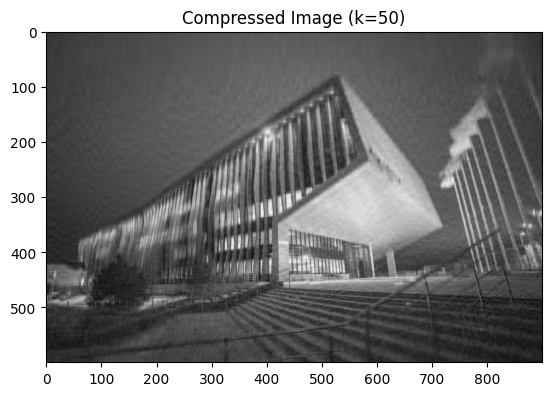

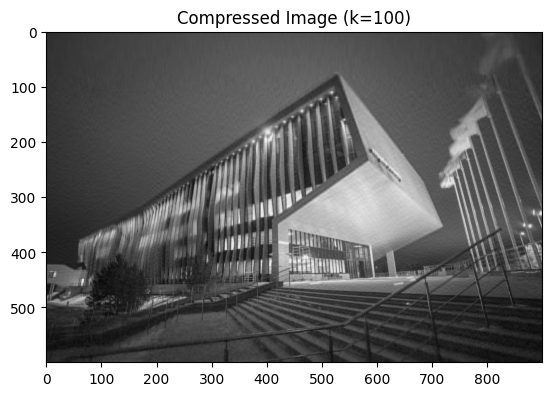

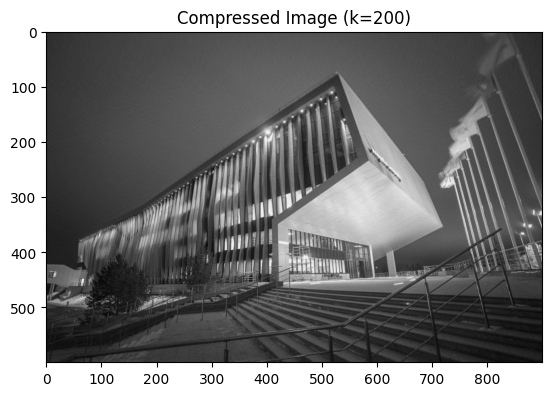

Original Size: 1170600, Compressed Size for k=10: 15010
Original Size: 1170600, Compressed Size for k=50: 75050
Original Size: 1170600, Compressed Size for k=100: 150100
Original Size: 1170600, Compressed Size for k=200: 300200


In [39]:
ks = [10, 50, 100, 200]

for k in ks:
    compressed_image = reconstruct_image(U, S, Vt, k)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compressed Image (k={k})')
    plt.show()


original_size = U.size + S.size + Vt.size
compressed_size_k = lambda k: U[:, :k].size + S[:k].size + Vt[:k, :].size

for k in ks:
    print(f"Original Size: {original_size}, Compressed Size for k={k}: {compressed_size_k(k)}")

### 2.4 Case Study: Compression Trade-off

- **Exercise 7**: Discuss the trade-off between image quality and file size as \( k \) decreases. What would be the practical applications of such compression techniques?

### 2.5 SVD for Data Compression in Other Domains (Optional Extension)

- **Exercise 8**: Use SVD to compress another dataset (e.g., a document-term matrix in text mining). Apply SVD for dimensionality reduction and compare the results.

## Summary of the Lab

- **Part 1** provided a detailed review of Linear Algebra concepts such as norms, projections, matrix operations, and orthogonality.
- **Part 2** explored SVD in depth, including applications in **image compression** and the practical trade-offs involved in data compression using SVD.